## Gather the data

In [24]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [17]:
# source: table 1 of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1304567/

# Format the data appropriately for cinnabar

# titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]
# wt = -18.35
# ddgs = [-17.60, -16.1, -16.97, -16.62, -18.23, -16.06, -16.44, -13.75, -13.87, -14.15, -14.49, -13.75, -14.22, -13.66] + [-17.60, -16.1, -16.97, -16.62, -18.23, -16.06, -16.44, -13.75, -13.87, -14.15, -14.49, -13.75, -14.22, -13.66]

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A"]
wt = -18.35
ddgs = [-17.60, -16.1, -16.97, -16.62, -18.23, -16.06, -16.44, -13.75, -13.87, -14.15, -14.49, -13.75, -14.22, -13.66]

to_plot = []

for sub_dir, ddg in enumerate(ddgs):
#     ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
#     dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg - wt, 0, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg - wt, 0, 0])

        

In [18]:
to_plot

[['Y29', 'F29', 0.75, 0, 0],
 ['Y29', 'A29', 2.25, 0, 0],
 ['W38', 'F38', 1.3800000000000026, 0, 0],
 ['T42', 'A42', 1.7300000000000004, 0, 0],
 ['W44', 'F44', 0.120000000000001, 0, 0],
 ['E76', 'A76', 2.2900000000000027, 0, 0],
 ['E80', 'A80', 1.9100000000000001, 0, 0],
 ['D35', 'A35', 4.600000000000001, 0, 0],
 ['D39', 'A39', 4.480000000000002, 0, 0],
 ['K27', 'A27', 4.200000000000001, 0, 0],
 ['R59', 'A59', 3.860000000000001, 0, 0],
 ['R83', 'Q83', 4.600000000000001, 0, 0],
 ['R87', 'A87', 4.130000000000001, 0, 0],
 ['H102', 'A102', 4.690000000000001, 0, 0]]

In [19]:
# Get the discrepancy between forward and negative reverse DDGs

for i in range(14):
    print(to_plot[i][0:2], to_plot[i][2] - to_plot[i+14][2])

IndexError: list index out of range

In [20]:
# Get the discrepancy from experiment

experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]
for i in range(28):
    print(to_plot[i][0:2], to_plot[i][2] - experiment[i])
    

['Y29', 'F29'] 0.85
['Y29', 'A29'] -1.15
['W38', 'F38'] -0.21999999999999753
['T42', 'A42'] -0.06999999999999962
['W44', 'F44'] 0.120000000000001
['E76', 'A76'] 0.8900000000000028
['E80', 'A80'] 1.4100000000000001
['D35', 'A35'] 0.10000000000000142
['D39', 'A39'] -3.219999999999998
['K27', 'A27'] -1.1999999999999993
['R59', 'A59'] -1.339999999999999
['R83', 'Q83'] -0.7999999999999989
['R87', 'A87'] -1.3699999999999992
['H102', 'A102'] -1.4099999999999984


IndexError: list index out of range

In [21]:
# Assemble experimental values

d = {'WT': 19.0, 'A27': 13.6, 'A59': 13.8, 'Q83': 13.6, 'A87': 13.5, 
     'A35': 14.5, 'A39': 11.3, 'A76': 17.65, 'A80': 18.5, 'F29': 19.1, 
     'A29': 15.6, 'F38': 17.4, 'A42': 17.2, 'F44': 19.0, 'A102': 12.9,
     
    '-A27': -13.6, '-A59': -13.8, '-Q83': -13.6, '-A87': -13.5, 
     '-A35': -14.5, '-A39': -11.3, '-A76': -17.65, '-A80': -18.5, '-F29': -19.1, 
     '-A29': -15.6, '-F38': -17.4, '-A42': -17.2, '-F44': -19.0, '-A102': -12.9
    }

experiment = []
for k in d.keys():
    if k == 'WT':
        for wt_residue in ['K27', 'R59', 'R83', 'R87', 'H102', 
                           'D35', 'D39', 'E76', 'E80',
                           'Y29', 'W38', 'T42', 'W44']:
            experiment.append([wt_residue, d[k]*-1, 0.1]) 
            experiment.append(["-" + wt_residue, d[k], 0.1])
    else:
        experiment.append([k, d[k]*-1, 0.1]) 
        
# Note: we take the negative of everything because the free energies are subtracted differently in Schreiber et al

## Calculated vs Experiment plot

In [22]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

In [25]:
# Write csv with data
pd.DataFrame(experiment + to_plot).to_csv(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_mmpbsa.csv", index=False, header=False)
# Had to manually add headings, otherwise the lists wouldn't print out as comma separated
# Had to remove extra commas in experimental block


In [26]:
# Create map with the csv file
fe = wrangle.FEMap('/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_input_mmpbsa.csv')


Graph is not connected enough to compute absolute values


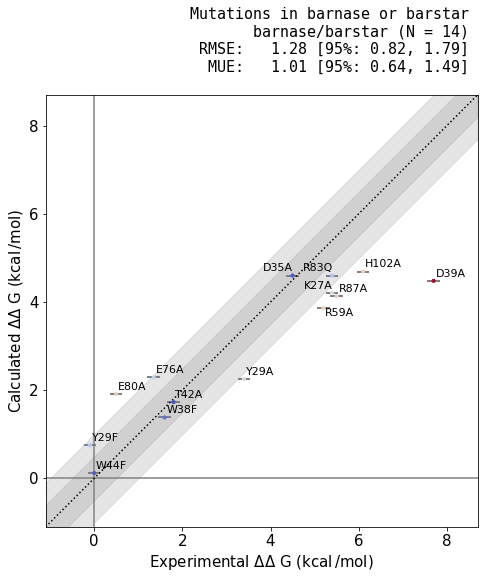

In [27]:
# Generate and save plot
plotting.plot_DDGs(fe.graph, 
                   target_name='barnase/barstar', 
                   title='Mutations in barnase or barstar', 
                   units=r'$\mathrm{kcal\,/mol}$', 
                   filename='/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_mmpbsa.pdf', 
                   figsize=10, 
                   dpi=500, 
                   data_label_type='protein-mutation', 
                   font_sizes={"title":15, "labels": 11, "other": 15},
                   axis_padding=1,)
#                    xy_lim=[-5, 16],)
